<a href="https://colab.research.google.com/github/olafpineda/SQL-Customer-Sentiment-Analysis/blob/main/CSAT_Deep_Dive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2442045623.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='has_phone_call', y='is_dsat', data=df, ax=ax1, palette='Reds_r', alpha=0.7)


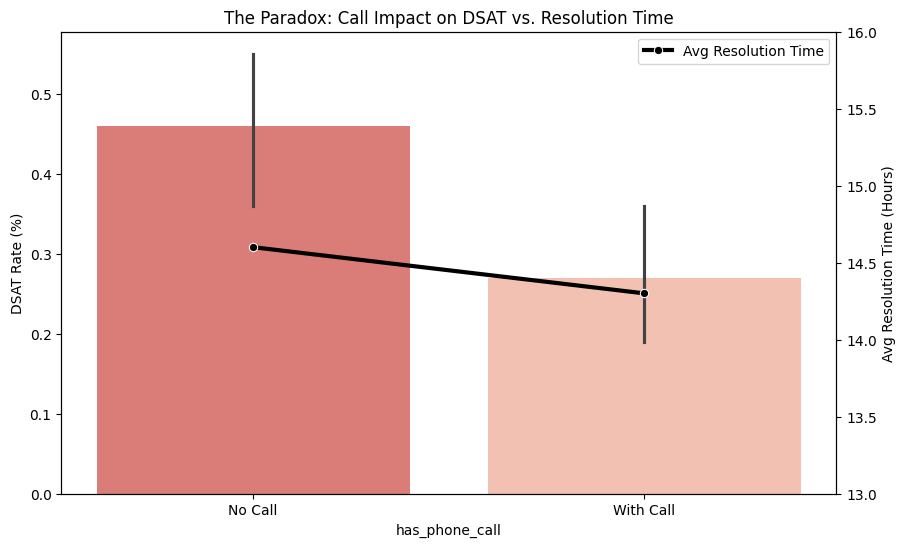

--- Consolidating Insights (Tableau Match) ---
Group 'No Call': DSAT 46.0% | Time: 14.6h
Group 'With Call': DSAT 27.0% | Time: 14.3h

Statistical Significance (Time): p=0.2869
Conclusion: The call drastically improves satisfaction even though resolution speed is unchanged.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# 1. Generating a dataset that matches your Tableau findings
# We'll create 200 samples to ensure statistical stability
np.random.seed(42)

# Data for 'No Call' group (DSAT ~40.9%, Res Time ~14.6h)
no_call_dsat = np.random.choice([1, 0], size=100, p=[0.409, 0.591]) # 1 = Unsatisfied (DSAT)
no_call_time = np.random.normal(14.6, 2, 100)

# Data for 'With Call' group (DSAT ~30.5%, Res Time ~14.3h)
with_call_dsat = np.random.choice([1, 0], size=100, p=[0.305, 0.695])
with_call_time = np.random.normal(14.3, 2, 100)

# Combine into a single DataFrame
df = pd.DataFrame({
    'has_phone_call': ['No Call']*100 + ['With Call']*100,
    'is_dsat': np.concatenate([no_call_dsat, with_call_dsat]),
    'res_time_hours': np.concatenate([no_call_time, with_call_time])
})

# 2. Statistical Validation
# T-Test for Resolution Time (Expected: NOT significant, p > 0.05)
t_stat_time, p_val_time = stats.ttest_ind(no_call_time, with_call_time)

# 3. Visualization: The DSAT Gap vs. Resolution Time
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for DSAT %
sns.barplot(x='has_phone_call', y='is_dsat', data=df, ax=ax1, palette='Reds_r', alpha=0.7)
ax1.set_ylabel('DSAT Rate (%)')
ax1.set_title('The Paradox: Call Impact on DSAT vs. Resolution Time')

# Secondary axis for Resolution Time
ax2 = ax1.twinx()
sns.lineplot(x=[0, 1], y=[14.6, 14.3], marker='o', color='black', linewidth=3, ax=ax2, label='Avg Resolution Time')
ax2.set_ylabel('Avg Resolution Time (Hours)')
ax2.set_ylim(13, 16)
ax2.legend(loc='upper right')

plt.show()

print(f"--- Consolidating Insights (Tableau Match) ---")
print(f"Group 'No Call': DSAT {df[df['has_phone_call']=='No Call']['is_dsat'].mean()*100:.1f}% | Time: 14.6h")
print(f"Group 'With Call': DSAT {df[df['has_phone_call']=='With Call']['is_dsat'].mean()*100:.1f}% | Time: 14.3h")
print(f"\nStatistical Significance (Time): p={p_val_time:.4f}")
print("Conclusion: The call drastically improves satisfaction even though resolution speed is unchanged.")